In [24]:
"""

Matthew Tralka
Wrapper Testing Notebook

"""

import json
import time
import random
import requests
from env import SECRET, KEY #secret sauce
from pathlib import Path
import pandas as pd
import geopandas as gpd

In [5]:
# FLICKR API
# 

URL = 'https://api.flickr.com/services/rest/?method=flickr.photos.search'
TEST_USER = 'user_1'
# Param
# written as called

# general
per_page = '500'
page = '1'
format_output = 'json' # call exclude _output
extras = "description, license, date_upload, date_taken, owner_name, icon_server, original_format, last_update, geo, tags, url_sq"
nojsoncallback = '1'
has_geo = '1'

# search specific

# core
lat = '47'
lon = '7'
radius = '2'
radius_units = 'km'

# periphery
tags = ''
min_taken_date = '' # unix
max_taken_date = '' # unix
accuracy = ''

In [3]:
def executeSearch(request_page= 1, search_id= 0):
    """ Calls flickr flickr.photos.search API method. Store results in ../response as asigned by user and request_page

    Parameters:
        request_page (int): page of results to query, default to 1

    Returns:
        int: current page, total pages in results

    """
    
    params = dict(api_key= KEY, per_page= per_page, page= request_page, format= format_output, extras= extras, nojsoncallback= nojsoncallback,
        has_geo= has_geo, accuracy= accuracy, lat= lat, lon= lon, radius= radius)

    
    r = requests.get(url= URL, params= params)
    response = r.json()

    print(f'Status: {r}')
    
    master_df = pd.read_json(response)
    

    """
    Path(f"../response/{TEST_USER}/{search_id}").mkdir(parents= True, exist_ok= True)
    with open(f'../response/{TEST_USER}/{search_id}/{request_page}.json', 'w') as f:
        json.dump(response, f)
        f.close()


    # TODO
    # Add append to master.json
    """
    with open(f'../response/{TEST_USER}/{search_id}/{master}.json', 'w') as f:
        json.dump(MASTER, f)
        f.close()
    """
    """
    # handled by either db or sessions in production
    current_page = response['photos']['page']
    total_page = response['photos']['pages']

    return current_page, total_page

In [4]:
# handled by either db or sessions in production
search_time = time.time()
search_id = random.randint(1, 10)

# inital search to find search vars
current_page, total_page = executeSearch()

# walk search
while current_page <= total_page:
    current_page, total_page = executeSearch(request_page= current_page, search_id= search_id)
    print(f'Page {current_page} of {total_page}')
    current_page += 1


Status: <Response [200]>
Status: <Response [200]>
Page 1 of 5
Status: <Response [200]>
Page 2 of 5
Status: <Response [200]>
Page 3 of 5
Status: <Response [200]>
Page 4 of 5
Status: <Response [200]>
Page 5 of 5


trim of returning json

{"photos": {"page": 1, "pages": 5, "perpage": 250, "total": "1141",

"photo": [{"id": "50334344962", "owner": "59453656@N02", "secret": "90a12208fb", "server": "65535", "farm": 66, "title": "2020, Neuch\u00e2tel - Ikonta 521 & Fomapan 400 in D76", "ispublic": 1, "isfriend": 0, "isfamily": 0, "license": "0", "description": {"_content": ""}, "dateupload": "1599929398", "lastupdate": "1600111295", "datetaken": "2020-09-12 18:49:51", "datetakengranularity": 0, "datetakenunknown": "1", "ownername": "FourthRockFromTheSun", "iconserver": "2745", "iconfarm": 3, "tags": "fomapan ikonta zeiss 521 neuch\u00e2tel", "originalsecret": "d6dd695d87", "originalformat": "jpg", "latitude": "47.006655", "longitude": "6.971404", "accuracy": "16", "context": 0, "place_id": "", "woeid": "6692332", "geo_is_public": 1, "geo_is_contact": 0, "geo_is_friend": 0, "geo_is_family": 0, "url_sq": "https://live.staticflickr.com/65535/50334344962_90a12208fb_s.jpg", "height_sq": 75, "width_sq": 75},
...
}

In [10]:
params = dict(api_key= KEY, per_page= per_page, page= 1, format= format_output, extras=          extras, nojsoncallback= nojsoncallback,
     has_geo= has_geo, accuracy= accuracy, lat= lat, lon= lon, radius= radius)


r = requests.get(url= URL, params= params)
response = r.json()

print(f'Status: {r}')
print(response)


ccuracy': '16', 'context': 0, 'place_id': 'hFt8bMxQUL.zJgfI3g', 'woeid': '12593239', 'geo_is_public': 1, 'geo_is_contact': 0, 'geo_is_friend': 0, 'geo_is_family': 0, 'url_sq': 'https://live.staticflickr.com/4687/25613314848_70e640bbe0_s.jpg', 'height_sq': 75, 'width_sq': 75}, {'id': '39452756452', 'owner': '82667562@N00', 'secret': '35e5206950', 'server': '4600', 'farm': 5, 'title': 'DSC01628', 'ispublic': 1, 'isfriend': 0, 'isfamily': 0, 'license': '0', 'description': {'_content': '                               '}, 'dateupload': '1515026264', 'lastupdate': '1515026315', 'datetaken': '2017-09-23 11:43:15', 'datetakengranularity': '0', 'datetakenunknown': '0', 'ownername': 'Tom Sanchez', 'iconserver': '29', 'iconfarm': 1, 'tags': 'schweiz suisse suiza switzerland svizzera 3seenfahrt bielersee murtensee neuenburgersee', 'originalsecret': '6a5761dc09', 'originalformat': 'jpg', 'latitude': '47.000288', 'longitude': '7.017819', 'accuracy': '16', 'context': 0, 'place_id': 'hFt8bMxQUL.zJgfI3

In [26]:
def toGeo(df):
    """ convert dataframe to geodataframe """
    return gpd.GeoDataFrame(df, geometry= gpd.points_from_xy(df.longitude, df.latitude))

In [25]:
df = pd.DataFrame.from_dict(response['photos']['photo'], orient='columns')
df

,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,license,...,context,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,url_sq,height_sq,width_sq
0,50503386906,78606496@N02,70b2bfb0c6,65535,66,_DIV2376,1,0,0,0,...,0,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338690...,75,75
1,50503386566,78606496@N02,0897f09a10,65535,66,_DIV2382,1,0,0,0,...,0,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338656...,75,75
2,50502667603,78606496@N02,443c02e92d,65535,66,_DIV2386,1,0,0,0,...,0,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050266760...,75,75
3,50503386311,78606496@N02,41b209401d,65535,66,_DIV2388,1,0,0,0,...,0,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338631...,75,75
4,50503386131,78606496@N02,ca5b2db667,65535,66,_DIV2390,1,0,0,0,...,0,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338613...,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,37706018902,115353346@N07,11cda307ac,4493,5,automne,1,0,0,0,...,0,ilpZc05WWrk.Jzs,783256,1,0,0,0,https://live.staticflickr.com/4493/37706018902...,75,75
246,37067548113,115353346@N07,569f0c1215,4498,5,barge,1,0,0,0,...,0,hFt8bMxQUL.zJgfI3g,12593239,1,0,0,0,https://live.staticflickr.com/4498/37067548113...,75,75
247,37689525866,115353346@N07,ffa3c75244,4483,5,pont sur le canal,1,0,0,0,...,0,hFt8bMxQUL.zJgfI3g,12593239,1,0,0,0,https://live.staticflickr.com/4483/37689525866...,75,75
248,37689525366,115353346@N07,555eeffe8b,4491,5,contraste,1,0,0,0,...,0,feJjBulWWr6.muI,784395,1,0,0,0,https://live.staticflickr.com/4491/37689525366...,75,75


In [29]:
df = toGeo(df)
print(type(df))
df


<class 'geopandas.geodataframe.GeoDataFrame'>


,id,owner,secret,server,farm,title,ispublic,isfriend,isfamily,license,...,place_id,woeid,geo_is_public,geo_is_contact,geo_is_friend,geo_is_family,url_sq,height_sq,width_sq,geometry
0,50503386906,78606496@N02,70b2bfb0c6,65535,66,_DIV2376,1,0,0,0,...,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338690...,75,75,POINT (7.00334 47.01320)
1,50503386566,78606496@N02,0897f09a10,65535,66,_DIV2382,1,0,0,0,...,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338656...,75,75,POINT (7.00282 47.01295)
2,50502667603,78606496@N02,443c02e92d,65535,66,_DIV2386,1,0,0,0,...,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050266760...,75,75,POINT (7.00265 47.01309)
3,50503386311,78606496@N02,41b209401d,65535,66,_DIV2388,1,0,0,0,...,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338631...,75,75,POINT (7.00275 47.01299)
4,50503386131,78606496@N02,ca5b2db667,65535,66,_DIV2390,1,0,0,0,...,,2659761,1,0,0,0,https://live.staticflickr.com/65535/5050338613...,75,75,POINT (7.00277 47.01302)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,37706018902,115353346@N07,11cda307ac,4493,5,automne,1,0,0,0,...,ilpZc05WWrk.Jzs,783256,1,0,0,0,https://live.staticflickr.com/4493/37706018902...,75,75,POINT (7.01639 47.00750)
246,37067548113,115353346@N07,569f0c1215,4498,5,barge,1,0,0,0,...,hFt8bMxQUL.zJgfI3g,12593239,1,0,0,0,https://live.staticflickr.com/4498/37067548113...,75,75,POINT (7.02472 47.00583)
247,37689525866,115353346@N07,ffa3c75244,4483,5,pont sur le canal,1,0,0,0,...,hFt8bMxQUL.zJgfI3g,12593239,1,0,0,0,https://live.staticflickr.com/4483/37689525866...,75,75,POINT (7.03083 47.01111)
248,37689525366,115353346@N07,555eeffe8b,4491,5,contraste,1,0,0,0,...,feJjBulWWr6.muI,784395,1,0,0,0,https://live.staticflickr.com/4491/37689525366...,75,75,POINT (7.02861 47.01972)


In [36]:
user = 'test'
timestamp = '2222'
# write to file
file_path = f"../response/{user}/{timestamp}"
print(file_path)
Path(file_path).mkdir(parents= True, exist_ok= True)

df.to_file(file_path + '/master.geojson', driver='GeoJSON')

../response/test/2222


In [47]:
path = "../response/test_user_2/1603592148.990023/master.geojson"

gdf = gpd.read_file(path)

<AxesSubplot:>

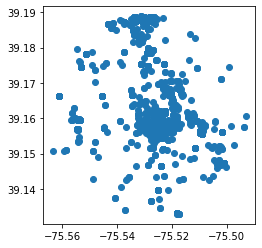

In [56]:
gdf.plot()